In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
coffee = pd.read_csv("coffee_data.csv")
#we will predict total cup points
coffee

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,Brazil,Fazenda Conquista,019/22,Dry Mill,NaN,Ipanema Coffees,950,Sul de Minas,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,Nicaragua,Finca San Felipe,017-053-0155,Beneficio Atlantic Sébaco,017-053-0155,Exportadora Atlantic S.A,1200,Matagalpa,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,204,204,Laos,-,105/3/VL7285-005,DRY MILL,105/3/VL7285-005,Marubeni Corporation,1300,Bolaven Plateau,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,205,205,El Salvador,"Rosario de Maria II, Area de La Pila",0423A01,"Optimum Coffee, San Salvador, El Salvador",NaN,Aprentium Enterprises LLC,1200,"Volcan de San Vicente, La Paz, El Salvador",...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600


In [147]:
coffee.describe()

,Unnamed: 0,ID,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.0,207.0,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000
mean,103.000000,103.000000,155.449275,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,10.0,10.0,7.676812,0.0,83.706570,10.735266,0.135266,0.690821,2.251208
std,59.899917,59.899917,244.484868,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.0,0.0,0.306359,0.0,1.730417,1.247468,0.592070,1.686918,2.950183
min,0.000000,0.000000,1.000000,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,10.0,10.0,6.670000,0.0,78.000000,0.000000,0.000000,0.000000,0.000000
25%,51.500000,51.500000,1.000000,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,10.0,10.0,7.500000,0.0,82.580000,10.100000,0.000000,0.000000,0.000000
50%,103.000000,103.000000,14.000000,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,10.0,10.0,7.670000,0.0,83.750000,10.800000,0.000000,0.000000,1.000000
75%,154.500000,154.500000,275.000000,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,10.0,10.0,7.920000,0.0,84.830000,11.500000,0.000000,1.000000,3.000000
max,206.000000,206.000000,2240.000000,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,10.0,10.0,8.580000,0.0,89.330000,13.500000,5.000000,12.000000,16.000000


In [148]:
coffee_num = coffee.select_dtypes(include = np.number)
coffee_num.drop("Overall", axis = 1, inplace = True)
coffee_num

,Unnamed: 0,ID,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
0,0,0,1,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,0.0,89.33,11.8,0,0,3
1,1,1,1,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,0.0,87.58,10.5,0,0,0
2,2,2,19,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,0.0,87.42,10.4,0,0,2
3,3,3,1,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,0.0,87.17,11.8,0,0,0
4,4,4,2,8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,0.0,87.08,11.6,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,2240,7.17,7.17,6.92,7.17,7.42,7.17,10.0,10.0,10.0,0.0,80.08,11.4,0,0,4
203,203,203,300,7.33,7.08,6.75,7.17,7.42,7.17,10.0,10.0,10.0,0.0,80.00,10.4,0,2,12
204,204,204,343,7.25,7.17,7.08,7.00,7.08,7.08,10.0,10.0,10.0,0.0,79.67,11.6,0,9,11
205,205,205,1,6.50,6.75,6.75,7.17,7.08,7.00,10.0,10.0,10.0,0.0,78.08,11.0,0,12,13


In [149]:
corr_matrix = coffee_num.corr()
corr_matrix["Total Cup Points"].sort_values(ascending = False)

Total Cup Points        1.000000
Flavor                  0.939124
Aftertaste              0.934813
Balance                 0.929520
Acidity                 0.897057
Aroma                   0.868919
Body                    0.847216
Uniformity              0.003556
Moisture Percentage    -0.046476
Category One Defects   -0.058156
Number of Bags         -0.243753
Category Two Defects   -0.314092
Quakers                -0.320307
Unnamed: 0             -0.963143
ID                     -0.963143
Clean Cup                    NaN
Sweetness                    NaN
Defects                      NaN
Name: Total Cup Points, dtype: float64

In [150]:
from pandas.plotting import scatter_matrix

#scatter_matrix(coffee_num.iloc[:, 3:], figsize = (26, 20))
coffee_num

,Unnamed: 0,ID,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
0,0,0,1,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,0.0,89.33,11.8,0,0,3
1,1,1,1,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,0.0,87.58,10.5,0,0,0
2,2,2,19,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,0.0,87.42,10.4,0,0,2
3,3,3,1,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,0.0,87.17,11.8,0,0,0
4,4,4,2,8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,0.0,87.08,11.6,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,2240,7.17,7.17,6.92,7.17,7.42,7.17,10.0,10.0,10.0,0.0,80.08,11.4,0,0,4
203,203,203,300,7.33,7.08,6.75,7.17,7.42,7.17,10.0,10.0,10.0,0.0,80.00,10.4,0,2,12
204,204,204,343,7.25,7.17,7.08,7.00,7.08,7.08,10.0,10.0,10.0,0.0,79.67,11.6,0,9,11
205,205,205,1,6.50,6.75,6.75,7.17,7.08,7.00,10.0,10.0,10.0,0.0,78.08,11.0,0,12,13


3    133
2     42
4     25
1      7
Name: Flavor_cat, dtype: int64

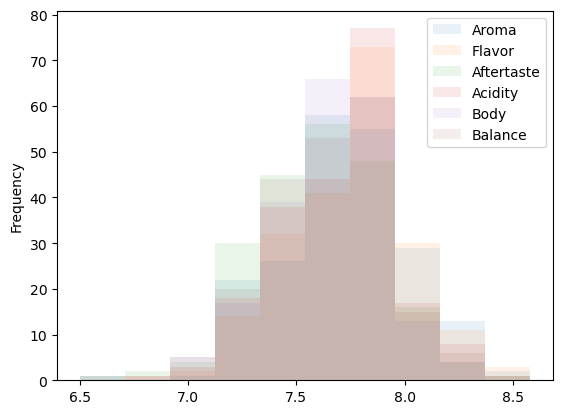

In [151]:
coffee_num.iloc[:, 3:9].plot(kind = "hist", alpha = 0.1)
coffee_bin = coffee_num.copy()
coffee_bin["Flavor_cat"] = pd.cut(coffee_num.iloc[:,4], bins = [0, 7.2, 7.5, 8.0, np.inf], labels = [1, 2, 3, 4])
coffee_bin["Flavor_cat"].value_counts()

In [152]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(coffee, test_size = 0.2, stratify = coffee_bin["Flavor_cat"], random_state = 42)

#for i in (strat_train_set, strat_test_set):
    #i.drop("Flavor_cat", axis = 1, inplace = True)
strat_test_set

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
193,193,193,Colombia,Escalera,CQU2022019,Escalera,NaN,Coffee Quality Union,1300-1800,Cauca,...,81.17,11.4,0,2,greenish,2,"December 22nd, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
45,45,45,Taiwan,青山坪咖啡農場,"The 2022 Pacific Rim Coffee Summit,T011",青山坪咖啡農場,NaN,Taiwan Coffee Laboratory,800,Yunlin,...,85.00,10.1,0,0,yellow green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
6,6,6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,"The 2022 Pacific Rim Coffee Summit,T034",野牡丹咖啡,NaN,Taiwan Coffee Laboratory,1250,Chiayi,...,86.92,9.1,0,0,green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
24,24,24,Taiwan,永舜咖啡莊園,"The 2022 Pacific Rim Coffee Summit, T003",永舜咖啡莊園,NaN,Taiwan Coffee Laboratory,1250,Yunlin,...,85.58,10.6,0,0,bluish-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
196,196,196,Nicaragua,EXPORTADORA ATLANTIC S.A,017/053/0603,Lavado,NaN,ISHIMITSU,1100,NaN,...,80.50,11.5,0,1,greenish,3,"July 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
108,108,108,Taiwan,恆珊農場,A05-Northern Taiwan Specialty Coffee Evaluation,恆珊農場,NaN,Taiwu Coffee Cooperative,200-400,新竹縣,...,83.67,9.2,0,0,greenish,0,"January 6th, 2024",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
181,181,181,Taiwan,阿拉思家,A10-Northern Taiwan Specialty Coffee Evaluation,阿拉思家,NaN,Taiwu Coffee Cooperative,300,桃園市,...,81.83,11.3,0,0,green,0,"January 6th, 2024",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
10,10,10,Ethiopia,TADE GG,010/0296/600,Moledo社 委託精選場,010/0296/600,"Marubeni corp.,",1800-2200,Guji,...,86.25,11.8,0,1,greenish,1,"May 31st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
102,102,102,United States (Hawaii),various farms,"The 2022 Pacific Rim Coffee Summit,US02",Aloha Hills Kona Coffee,NaN,Taiwan Coffee Laboratory,400-600,Ka'u,...,83.83,11.8,0,3,green,3,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
84,84,84,Taiwan,竹崙子莊園,A32-Northern Taiwan Specialty Coffee Evaluation,竹崙子莊園,NaN,Taiwu Coffee Cooperative,150,新北市,...,84.08,10.8,0,0,greenish,2,"January 6th, 2024",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"


In [153]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer

log_pipeline = make_pipeline(SimpleImputer(strategy = "median"), FunctionTransformer(np.log, feature_names_out = "one-to-one"),
                            StandardScaler())
num_pipeline = make_pipeline(SimpleImputer(strategy = "median"), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy = "most_frequent"), OneHotEncoder(handle_unknown = "ignore"))

preprocessing = ColumnTransformer([("num", num_pipeline, make_column_selector(dtype_include = np.number)),
                                  ("cat", cat_pipeline, make_column_selector(dtype_include = object)),
                                  ("log", log_pipeline, ["Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance"])])

In [154]:
strat_train_set[strat_train_set.select_dtypes(include = "int64").columns] = strat_train_set[strat_train_set.select_dtypes(include = "int64").columns].astype("float")

In [155]:
coffee_prepared = preprocessing.fit_transform(strat_train_set)
coffee = strat_train_set.drop("Total Cup Points", axis = 1)
coffee_labels = strat_train_set["Total Cup Points"].copy()

In [156]:
from sklearn.svm import SVR

model = make_pipeline(preprocessing, SVR(kernel = "linear"))
model.fit(coffee, coffee_labels)
coffee_scores = model.predict(coffee)

In [157]:
from sklearn.metrics import mean_squared_error

svm_rmse = mean_squared_error(coffee_labels, coffee_scores, squared = False)
svm_rmse

0.06390702622764977

In [158]:
from sklearn.model_selection import cross_val_score

finished = preprocessing.fit_transform(coffee)
svm_rmses = -cross_val_score(model, coffee, coffee_labels, scoring = "neg_root_mean_squared_error", cv = 10)
svm_rmses

array([0.12526424, 0.06212108, 0.07850272, 0.06250857, 0.09272561,
       0.10188978, 0.05447423, 0.11396   , 0.08022409, 0.10094737])

In [159]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

param_distrib = {"svm__kernel": ["linear", "rbf"]}
full_pipeline = Pipeline([("preprocessing", preprocessing), ("svm", SVR(kernel = "linear"))])

rnd_search = RandomizedSearchCV(full_pipeline, param_distributions = param_distrib, n_iter = 10, cv = 3, 
                                scoring = "neg_root_mean_squared_error", random_state = 42)
rnd_search.fit(coffee, coffee_labels)

C:\python stuff\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x0000023CEC55F6A0>),
                                                                              ('cat',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer...
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                    func=<ufunc 'log'>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['Aroma',
                                                                                'Flavor',
                                                                                'Aftertaste',
                                                                                'Acidity',
                                                                                'Body',
                                                                                'Balance'])])),
                                             ('svm', SVR(kernel='linear'))]),
                   param_distributions={'svm__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_root_mean_squared_error')

Feature: Unnamed: 0, Score: 0.028820
Feature: ID, Score: 0.028820
Feature: Country of Origin, Score: 0.000034
Feature: Farm Name, Score: 0.000119
Feature: Lot Number, Score: 0.000145
Feature: Mill, Score: 0.000110
Feature: ICO Number, Score: 0.000014
Feature: Company, Score: 0.000008
Feature: Altitude, Score: 0.000087
Feature: Region, Score: 0.000099
Feature: Producer, Score: 0.000113
Feature: Number of Bags, Score: 0.000312
Feature: Bag Weight, Score: 0.000070
Feature: In-Country Partner, Score: -0.000037
Feature: Harvest Year, Score: 0.000021
Feature: Grading Date, Score: 0.000016
Feature: Owner, Score: 0.000079
Feature: Variety, Score: 0.000088
Feature: Status, Score: 0.000000
Feature: Processing Method, Score: 0.000192
Feature: Aroma, Score: 0.136009
Feature: Flavor, Score: 0.162497
Feature: Aftertaste, Score: 0.106611
Feature: Acidity, Score: 0.091813
Feature: Body, Score: 0.090185
Feature: Balance, Score: 0.121175
Feature: Uniformity, Score: 0.018148
Feature: Clean Cup, Score: 0.

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023CEC55F2B0>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneh...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023CEC556610>),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Aroma', 'Flavor',
                                                   'Aftertaste', 'Acidity',
                                                   'Body', 'Balance'])])),
                ('svm', SVR(kernel='linear'))])

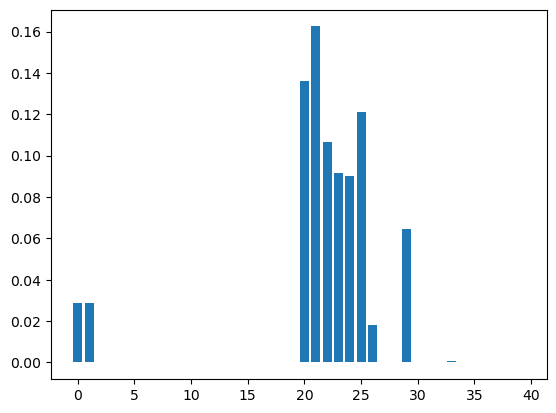

In [160]:
from sklearn.inspection import permutation_importance

final_model = rnd_search.best_estimator_
results = permutation_importance(final_model, coffee, coffee_labels, scoring = "neg_mean_squared_error")
importance = results.importances_mean
drop_list = []
for i, v in enumerate(importance):
    print("Feature: %s, Score: %f" % (coffee.columns[i], v))
    if v < 0.0001:
        drop_list.append(coffee.columns[i])
plt.bar([x for x in range(len(importance))], importance)
coffee_data = coffee.drop(drop_list, axis = 1)
final_model.fit(coffee_data, coffee_labels)

In [161]:
x_test = strat_test_set.drop(drop_list, axis = 1)
y_test = strat_test_set["Total Cup Points"]

In [162]:
final_predictions = final_model.predict(x_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared = False)

In [167]:
x_test

,Unnamed: 0,ID,Farm Name,Lot Number,Mill,Producer,Number of Bags,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Quakers
193,193,193,Escalera,CQU2022019,Escalera,Escalera,1,Washed / Wet,7.42,7.25,7.25,7.42,7.17,7.33,10.0,7.33,81.17,2
45,45,45,青山坪咖啡農場,"The 2022 Pacific Rim Coffee Summit,T011",青山坪咖啡農場,王清連,6,Natural / Dry,8.17,8.08,7.83,7.67,7.67,7.75,10.0,7.83,85.00,0
6,6,6,野牡丹咖啡莊園 Melastoma Coffee Estate,"The 2022 Pacific Rim Coffee Summit,T034",野牡丹咖啡,黃保錫,1,Washed / Wet,8.33,8.17,8.08,8.00,7.83,8.25,10.0,8.25,86.92,0
24,24,24,永舜咖啡莊園,"The 2022 Pacific Rim Coffee Summit, T003",永舜咖啡莊園,蘇甘永,4,Washed / Wet,7.83,8.00,7.92,8.00,8.00,7.92,10.0,7.92,85.58,0
196,196,196,EXPORTADORA ATLANTIC S.A,017/053/0603,Lavado,Varios Productores,275,Washed / Wet,7.25,7.25,7.17,7.33,7.08,7.25,10.0,7.17,80.50,1
108,108,108,恆珊農場,A05-Northern Taiwan Specialty Coffee Evaluation,恆珊農場,羅以珊,1,Pulped natural / honey,7.58,7.75,7.67,7.83,7.50,7.67,10.0,7.67,83.67,0
181,181,181,阿拉思家,A10-Northern Taiwan Specialty Coffee Evaluation,阿拉思家,李秀圓,1,Pulped natural / honey,7.25,7.42,7.42,7.50,7.42,7.42,10.0,7.42,81.83,0
10,10,10,TADE GG,010/0296/600,Moledo社 委託精選場,Tesfaye Bekele Degaga,10,Natural / Dry,8.08,8.25,8.00,8.08,7.92,7.92,10.0,8.00,86.25,1
102,102,102,various farms,"The 2022 Pacific Rim Coffee Summit,US02",Aloha Hills Kona Coffee,Isla Custom Coffees,4,Washed / Wet,7.67,7.92,7.58,7.58,7.58,7.75,10.0,7.75,83.83,3
84,84,84,竹崙子莊園,A32-Northern Taiwan Specialty Coffee Evaluation,竹崙子莊園,邱建明,1,Pulped natural / honey,7.83,7.92,7.83,7.58,7.58,7.67,10.0,7.67,84.08,0


In [168]:
import joblib

joblib.dump(final_model, "coffee_rater_based_on_taste")

['coffee_rater_based_on_taste']